In [1]:
import numpy as np
from datasets import Dataset
from PIL import Image
import pathlib
from transformers import SamProcessor
from transformers import SamModel, SamConfig
from torch.utils.data import DataLoader
from patchify import patchify
import os
import torch
from torch.optim import Adam
import monai
from transformers import SamModel, SamProcessor
import fishLoader as fish
import pre_proc_func as ppf
from tqdm import tqdm
from statistics import mean
import torch
from torch.nn.functional import threshold, normalize
import logging
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import platform
import matplotlib.pyplot as plt
import cv2

c:\Users\tiger\anaconda3\envs\FISH\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

def plt_result(result, img):
    plt.figure(figsize=(20,20))
    plt.imshow(img)
    plt.axis('off')
    show_anns(result)

In [3]:
target = pathlib.Path("./201-250_Hong/MAX_CTLa_w1-359 DAPI_s012.tif")
img_org = Image.open(target)
img = cv2.cvtColor(np.array(img_org), cv2.COLOR_GRAY2RGB).astype(np.float32)
device = "cuda" if torch.cuda.is_available() else "cpu"

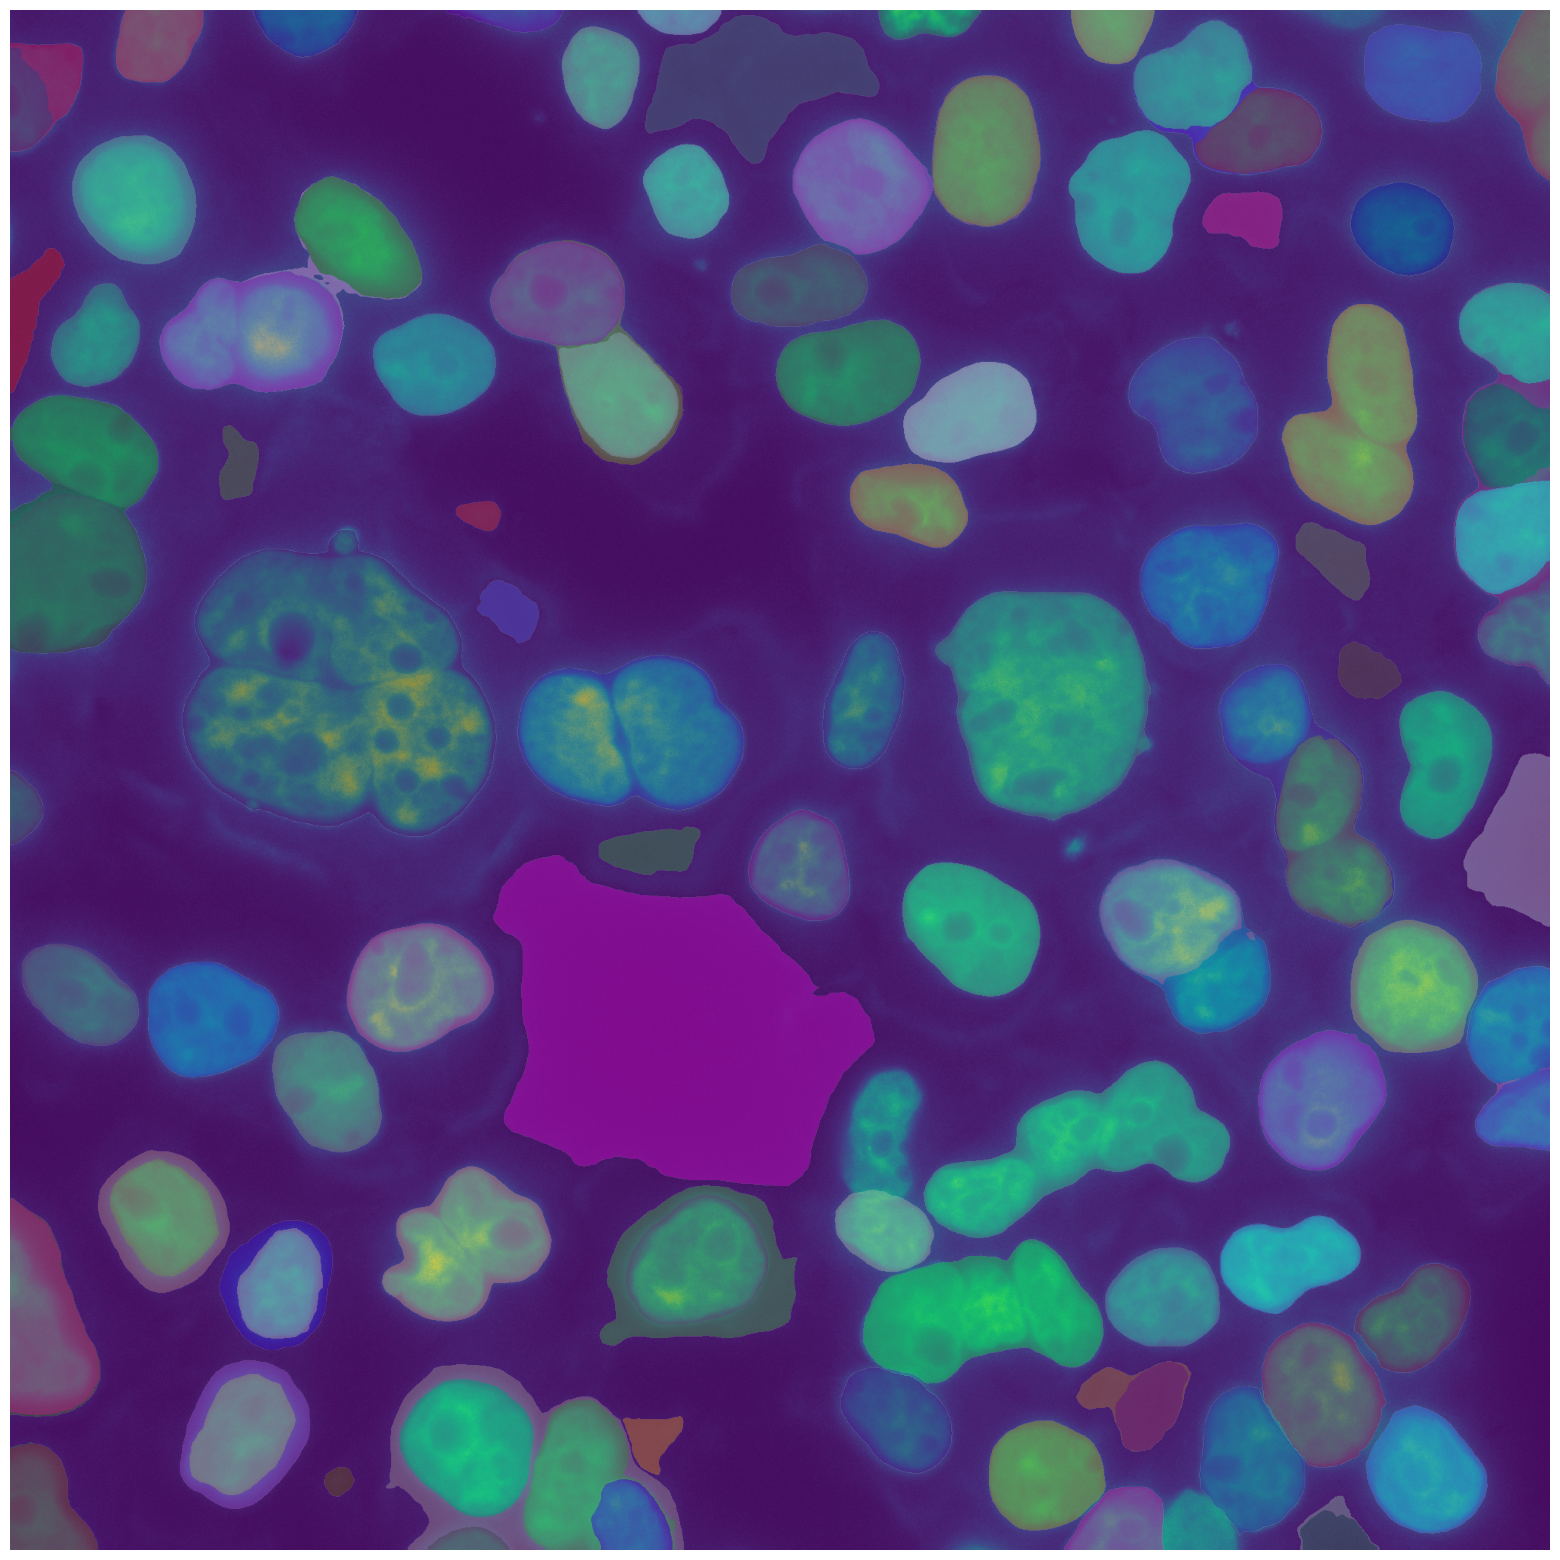

In [4]:
sam_b = sam_model_registry["vit_b"](checkpoint=pathlib.Path("./sam_vit_b_01ec64.pth"))
sam_b.to(device)
mg_b = SamAutomaticMaskGenerator(sam_b)
result_b = mg_b.generate(img)
plt_result(result_b, img_org)

In [6]:
# Load the entire model object
model = torch.load("./fish_segmentation_model_1.0.pth")
model.to(device)

# Assuming 'SamAutomaticMaskGenerator' requires a 'SamModel' object
mg_t = SamAutomaticMaskGenerator(model)
result_t = mg_t.generate(img)
plt_result(result_t, img_org)


AttributeError: 'SamModel' object has no attribute 'image_encoder'

In [ ]:
model_config = SamConfig.from_pretrained("facebook/sam-vit-base")
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")
m_t = SamModel(config=model_config)
m_t.load_state_dict(torch.load(pathlib.Path("./fish_segmentation_model_1.0.pth")))
m_t.to(device)
mg_t = SamAutomaticMaskGenerator(m_t)
result_t = mg_t.generate(img)
plt_result(result_t, img_org)

TypeError: Expected state_dict to be dict-like, got <class 'transformers.models.sam.modeling_sam.SamModel'>.